참조 https://hyunlee103.tistory.com/39   
https://m.blog.naver.com/sooftware/221646956569

In [1]:
import librosa
import librosa.display as dsp
import matplotlib.pyplot as plt

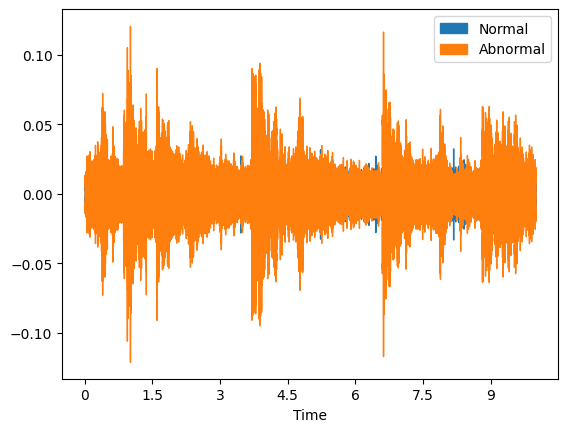

In [2]:
normal_data, sample_rate = librosa.load('../../data/mimii/0_dB/pump/id_00/normal/00000000.wav', sr=16000)

#파형을 그래프로 그림
dsp.waveshow(normal_data,sr=sample_rate, label="Normal")

#소리 재생
from IPython.display import Audio
Audio(data=normal_data,rate=sample_rate)

abnormal_data, sample_rate = librosa.load('../../data/mimii/0_dB/pump/id_00/abnormal/00000000.wav', sr=16000)

#파형을 그래프로 그림
dsp.waveshow(abnormal_data,sr=sample_rate, label="Abnormal")

#소리 재생
from IPython.display import Audio
Audio(data=abnormal_data,rate=sample_rate)

plt.legend(loc="upper right")
plt.show()

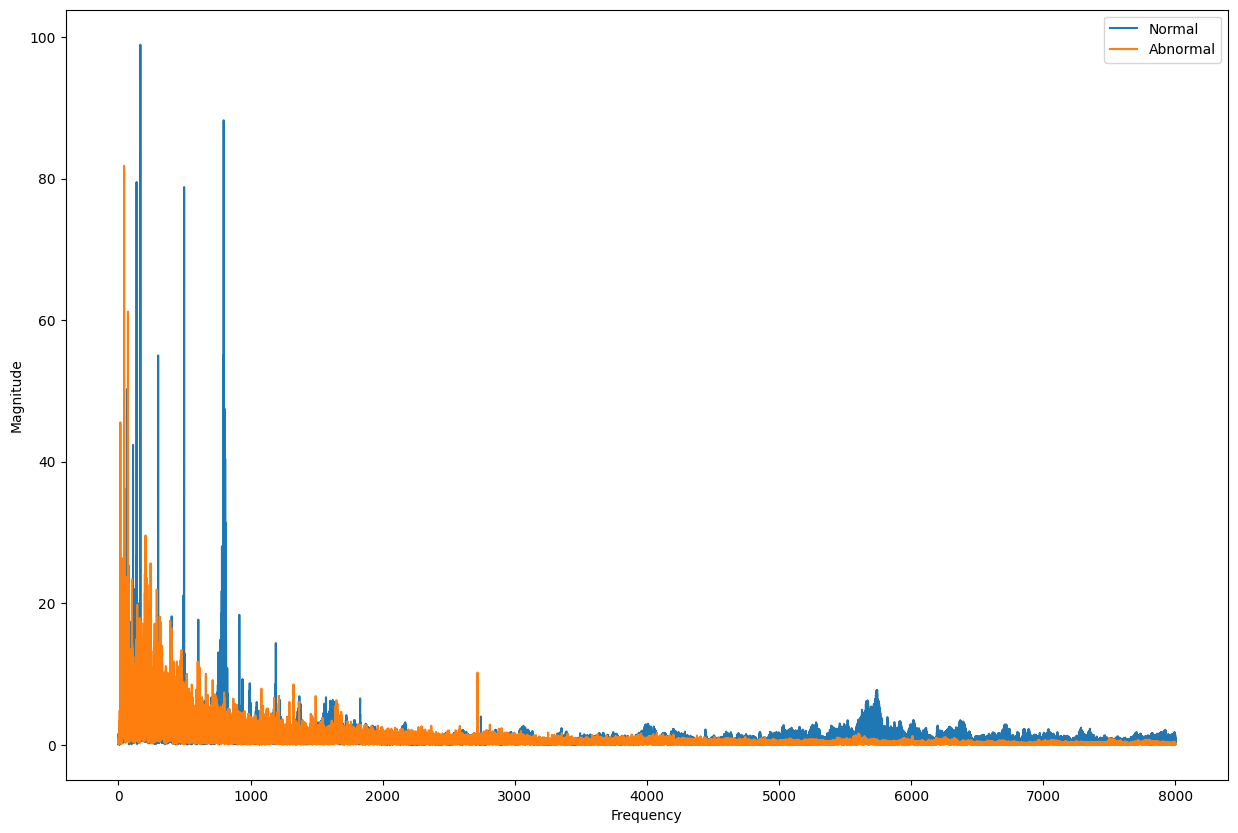

In [3]:
import numpy as np

normal_data, sample_rate = librosa.load('../../data/mimii/0_dB/valve/id_00/normal/00000000.wav', sr=16000)
abnormal_data, sample_rate = librosa.load('../../data/mimii/0_dB/valve/id_00/abnormal/00000000.wav', sr=16000)

# 퓨리에 연산을 빠르게 수행해주는 fft(Fast Fourier Transform)을 사용하여 변환
# 퓨리에 연산 시(np.fft.fft()) 실수부와 허수부를 반환함
fft = np.fft.fft(normal_data) 
magnitude = np.abs(fft)

# 0부터 sample_rate까지 magnitude의 개수만큼의 배열값을 만듬
frequency = np.linspace(0, sample_rate, len(magnitude))

# 실수부만 보기 위해 변환값에 절대값을 씌우고, 반으로 나누면 실수부만 데이터를 확인할 수 있다.
# 실수부와 허수부는 동일한 값을 가지고 있고, 여기서는 데이터 해석의 목적만 가지므로 실수부만 본다.
left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(magnitude)/2)]

fig = plt.figure(figsize = (15,10))
plt.plot(left_frequency, left_magnitude, label="Normal")

abnormal_fft = np.fft.fft(abnormal_data) 
abnormal_magnitude = np.abs(abnormal_fft)

# 0부터 sample_rate까지 magnitude의 개수만큼의 배열값을 만듬
abnormal_frequency = np.linspace(0, sample_rate, len(abnormal_magnitude))

# 실수부만 보기 위해 변환값에 절대값을 씌우고, 반으로 나누면 실수부만 데이터를 확인할 수 있다.
# 실수부와 허수부는 동일한 값을 가지고 있고, 여기서는 데이터 해석의 목적만 가지므로 실수부만 본다.
left_abnormal_frequency = abnormal_frequency[:int(len(abnormal_frequency)/2)]
left_abnormal_magnitude = abnormal_magnitude[:int(len(abnormal_magnitude)/2)]

plt.plot(left_abnormal_frequency, left_abnormal_magnitude, label="Abnormal")


plt.legend(loc="upper right")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

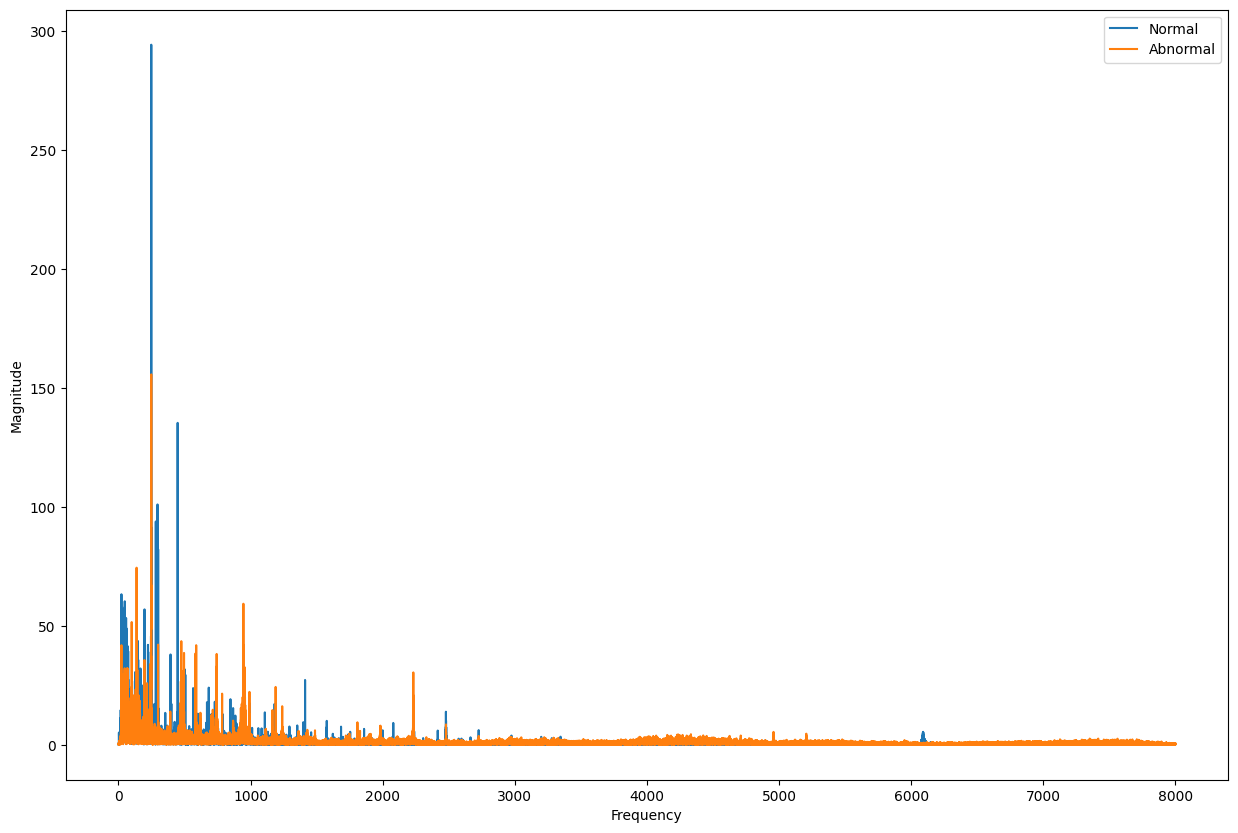

In [4]:
import numpy as np

normal_data, sample_rate = librosa.load('../../data/mimii/0_dB/slider/id_02/normal/00000000.wav', sr=16000)
abnormal_data, sample_rate = librosa.load('../../data/mimii/0_dB/slider/id_02/abnormal/00000000.wav', sr=16000)

# 퓨리에 연산을 빠르게 수행해주는 fft(Fast Fourier Transform)을 사용하여 변환
# 퓨리에 연산 시(np.fft.fft()) 실수부와 허수부를 반환함
fft = np.fft.fft(normal_data) 
magnitude = np.abs(fft)

# 0부터 sample_rate까지 magnitude의 개수만큼의 배열값을 만듬
frequency = np.linspace(0, sample_rate, len(magnitude))

# 실수부만 보기 위해 변환값에 절대값을 씌우고, 반으로 나누면 실수부만 데이터를 확인할 수 있다.
# 실수부와 허수부는 동일한 값을 가지고 있고, 여기서는 데이터 해석의 목적만 가지므로 실수부만 본다.
left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(magnitude)/2)]

fig = plt.figure(figsize = (15,10))
plt.plot(left_frequency, left_magnitude, label="Normal")

abnormal_fft = np.fft.fft(abnormal_data) 
abnormal_magnitude = np.abs(abnormal_fft)

# 0부터 sample_rate까지 magnitude의 개수만큼의 배열값을 만듬
abnormal_frequency = np.linspace(0, sample_rate, len(abnormal_magnitude))

# 실수부만 보기 위해 변환값에 절대값을 씌우고, 반으로 나누면 실수부만 데이터를 확인할 수 있다.
# 실수부와 허수부는 동일한 값을 가지고 있고, 여기서는 데이터 해석의 목적만 가지므로 실수부만 본다.
left_abnormal_frequency = abnormal_frequency[:int(len(abnormal_frequency)/2)]
left_abnormal_magnitude = abnormal_magnitude[:int(len(abnormal_magnitude)/2)]

plt.plot(left_abnormal_frequency, left_abnormal_magnitude, label="Abnormal")


plt.legend(loc="upper right")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

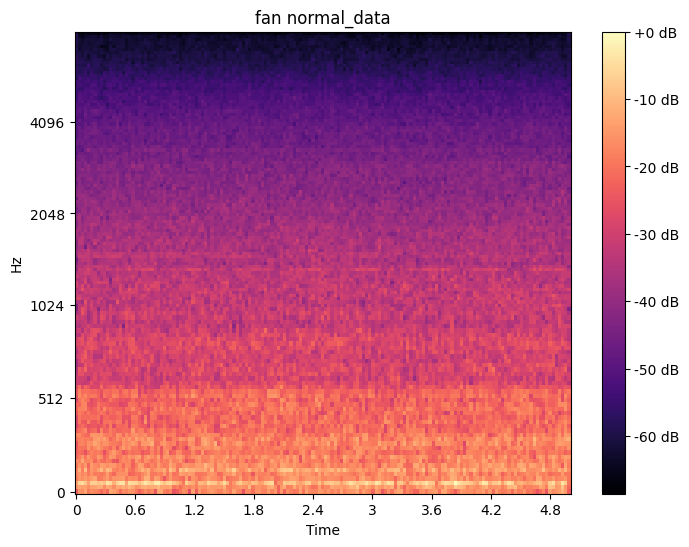

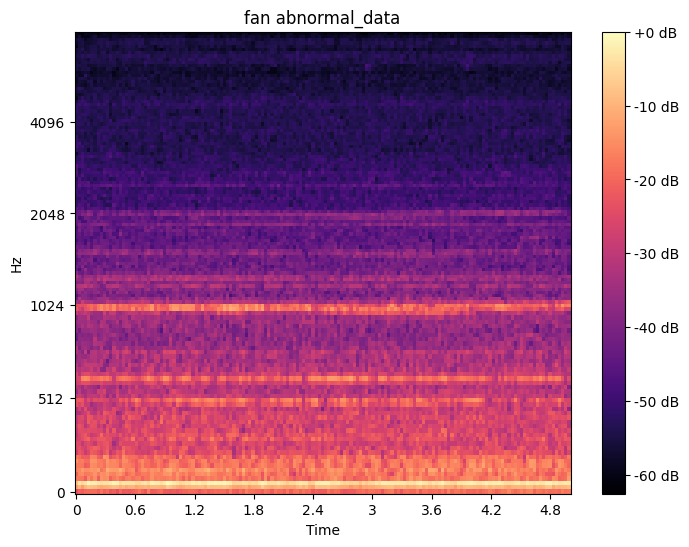

In [5]:
normal_data, sample_rate = librosa.load('../../data/mimii/0_dB/fan/id_00/normal/00000000.wav', sr=16000)
abnormal_data, sample_rate = librosa.load('../../data/mimii/0_dB/fan/id_00/abnormal/00000000.wav', sr=16000)

mel_spec = librosa.feature.melspectrogram(y=normal_data, sr=sample_rate, n_fft=2048, hop_length=1024)
mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

plt.figure(figsize=(8,6))
librosa.display.specshow(mel_spec, y_axis='mel', fmax=8000, x_axis='time',sr=sample_rate)
plt.title('fan normal_data')
plt.colorbar(format='%+2.0f dB')

mel_spec = librosa.feature.melspectrogram(y=abnormal_data, sr=sample_rate, n_fft=2048, hop_length=1024)
mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

plt.figure(figsize=(8,6))
librosa.display.specshow(mel_spec, y_axis='mel', fmax=8000, x_axis='time',sr=sample_rate)
plt.title('fan abnormal_data')
plt.colorbar(format='%+2.0f dB')

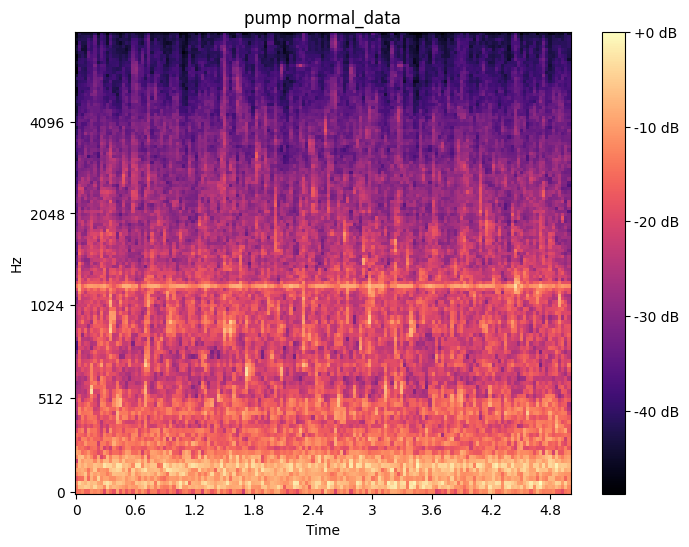

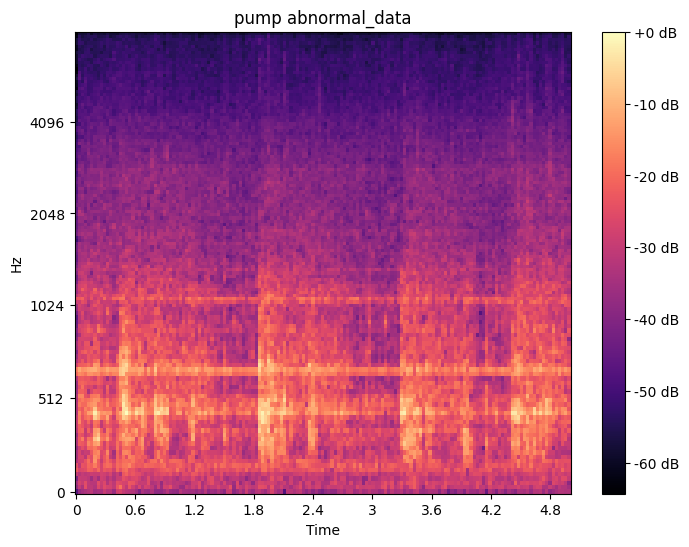

In [6]:
normal_data, sample_rate = librosa.load('../../data/mimii/0_dB/pump/id_00/normal/00000000.wav', sr=16000)
abnormal_data, sample_rate = librosa.load('../../data/mimii/0_dB/pump/id_00/abnormal/00000000.wav', sr=16000)

mel_spec = librosa.feature.melspectrogram(y=normal_data, sr=sample_rate, n_fft=2048, hop_length=1024)
mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

plt.figure(figsize=(8,6))
librosa.display.specshow(mel_spec, y_axis='mel', fmax=8000, x_axis='time',sr=sample_rate)
plt.title('pump normal_data')
plt.colorbar(format='%+2.0f dB')

mel_spec = librosa.feature.melspectrogram(y=abnormal_data, sr=sample_rate, n_fft=2048, hop_length=1024)
mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

plt.figure(figsize=(8,6))
librosa.display.specshow(mel_spec, y_axis='mel', fmax=8000, x_axis='time',sr=sample_rate)
plt.title('pump abnormal_data')
plt.colorbar(format='%+2.0f dB')

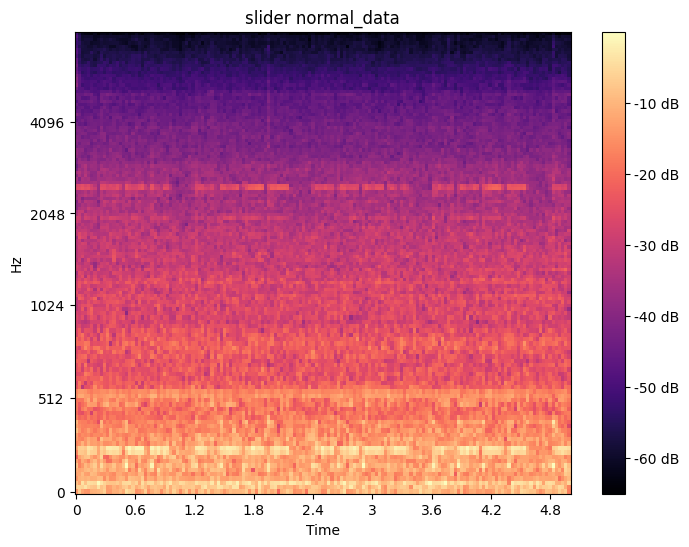

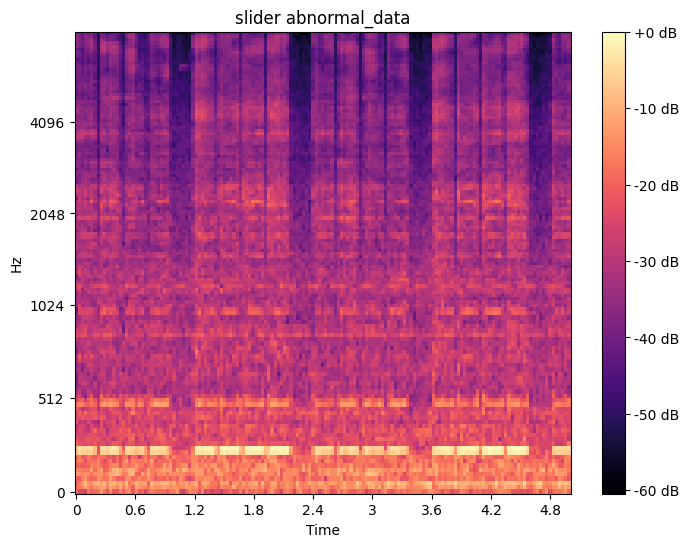

In [7]:
normal_data, sample_rate = librosa.load('../../data/mimii/0_dB/slider/id_00/normal/00000000.wav', sr=16000)
abnormal_data, sample_rate = librosa.load('../../data/mimii/0_dB/slider/id_00/abnormal/00000000.wav', sr=16000)

mel_spec = librosa.feature.melspectrogram(y=normal_data, sr=sample_rate, n_fft=2048, hop_length=1024)
mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

plt.figure(figsize=(8,6))
librosa.display.specshow(mel_spec, y_axis='mel', fmax=8000, x_axis='time',sr=sample_rate)
plt.title('slider normal_data')
plt.colorbar(format='%+2.0f dB')

mel_spec = librosa.feature.melspectrogram(y=abnormal_data, sr=sample_rate, n_fft=2048, hop_length=1024)
mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

plt.figure(figsize=(8,6))
librosa.display.specshow(mel_spec, y_axis='mel', fmax=8000, x_axis='time',sr=sample_rate)
plt.title('slider abnormal_data')
plt.colorbar(format='%+2.0f dB')

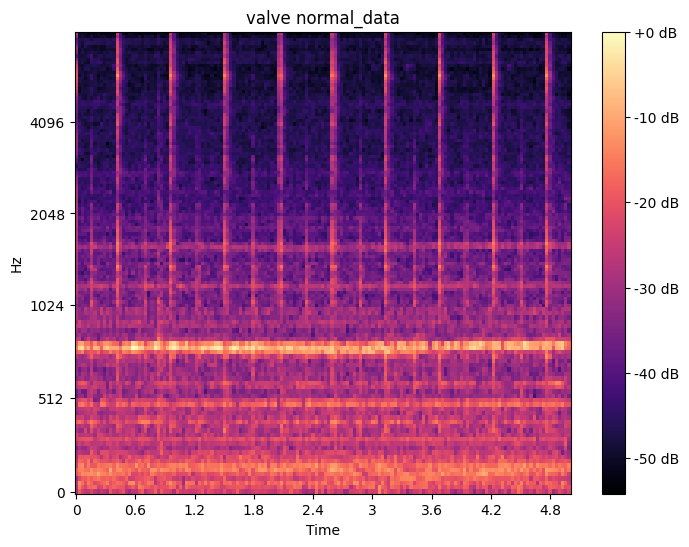

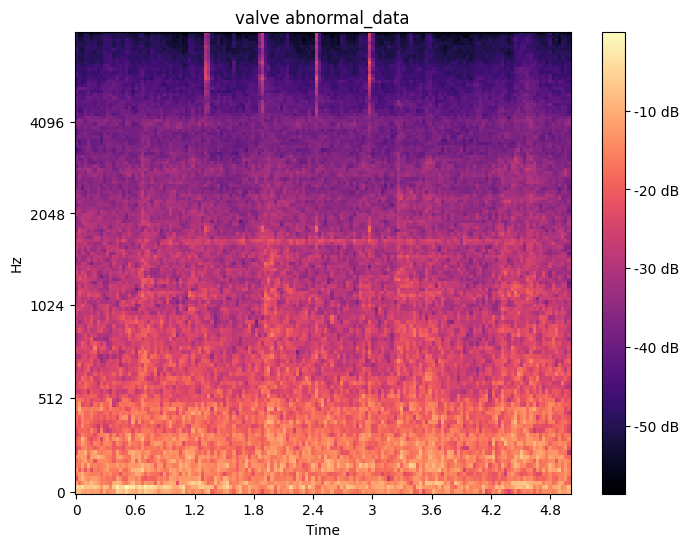

In [8]:
normal_data, sample_rate = librosa.load('../../data/mimii/0_dB/valve/id_00/normal/00000000.wav', sr=16000)
abnormal_data, sample_rate = librosa.load('../../data/mimii/0_dB/valve/id_00/abnormal/00000000.wav', sr=16000)

mel_spec = librosa.feature.melspectrogram(y=normal_data, sr=sample_rate, n_fft=2048, hop_length=1024)
mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

plt.figure(figsize=(8,6))
librosa.display.specshow(mel_spec, y_axis='mel', fmax=8000, x_axis='time', sr=sample_rate)
plt.title('valve normal_data')
plt.colorbar(format='%+2.0f dB')

mel_spec = librosa.feature.melspectrogram(y=abnormal_data, sr=sample_rate, n_fft=2048, hop_length=1024)
mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

plt.figure(figsize=(8,6))
librosa.display.specshow(mel_spec, y_axis='mel', fmax=8000, x_axis='time',sr=sample_rate)
plt.title('valve abnormal_data')
plt.colorbar(format='%+2.0f dB')

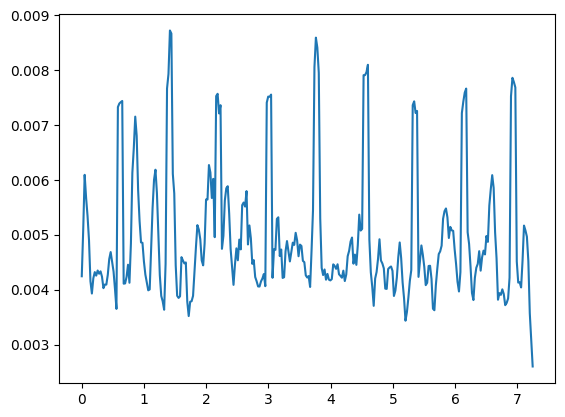

In [9]:
rms = librosa.feature.rms(y=normal_data)

times = librosa.times_like(rms)
plt.plot(times, rms[0])

In [10]:
duration = librosa.get_duration(y=normal_data)

# Find peaks
onset_env = librosa.onset.onset_strength(y=normal_data, sr=16000,
                                         hop_length=512,
                                         aggregate=np.median)
peaks = librosa.util.peak_pick(onset_env, pre_max=3, post_max=3, pre_avg=3, post_avg=5, delta=0.5, wait=10)

# Print peaks list to console
print('Peaks detected at: ', librosa.frames_to_time(peaks, sr=16000))

Peaks detected at:  [0.352 0.896 1.44  1.984 2.528 3.072 3.648 4.16  4.544 5.248 5.792 6.336
 6.88  7.424 7.968 8.512 9.056 9.6  ]
